In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [23]:
delivery_data=pd.read_csv('delivery_time (1).csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
delivery_data.shape

(21, 2)

In [25]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [26]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

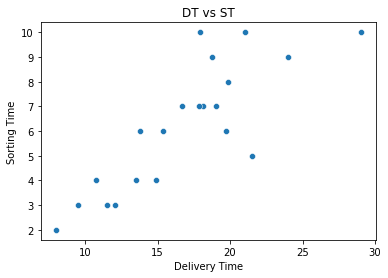

In [27]:
#1)linearity test
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=delivery_data)
plt.title('DT vs ST')
plt.show()

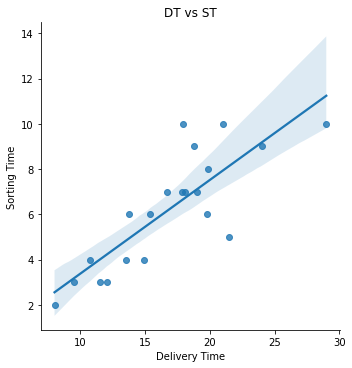

In [28]:
sns.lmplot(x='Delivery Time',y='Sorting Time',data=delivery_data)
plt.title('DT vs ST')
plt.show()

linearity test is failed

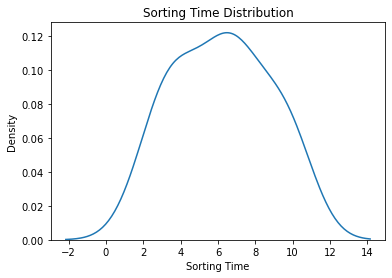

In [29]:
#normality test
sns.distplot(a=delivery_data['Sorting Time'],hist=False)
plt.title('Sorting Time Distribution')
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [30]:
delivery_data['Sorting Time'].skew()

0.047115474210530174

In [31]:
delivery_data['Sorting Time'].kurt()

-1.14845514534878

normality test failed

In [32]:
#AUTO REGRESSION is passed

In [33]:
#multicollinearity test
m_data=delivery_data.corr().round(2)
m_data

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


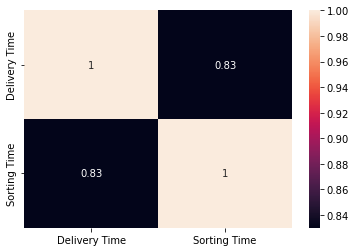

In [34]:
sns.heatmap(data=m_data,annot=True)
plt.show()

In [35]:
#homoscadasticity test..
#for this test we need errors ....


In [36]:
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [37]:
x=delivery_data.drop('Sorting Time',axis=1)
y=delivery_data['Sorting Time']

In [38]:
x=delivery_data.drop('Sorting Time',axis=1)
y=delivery_data['Sorting Time']

In [39]:
x.shape,y.shape

((21, 1), (21,))

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=101,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16, 1), (5, 1), (16,), (5,))

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
pred = lr.predict(x_test)
pred

array([3.5041342 , 2.90902234, 7.57073194, 9.25688222, 5.09109917])

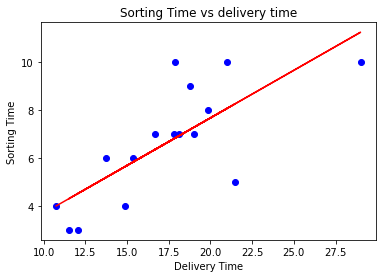

In [43]:
#MODEL TESTING
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train['Delivery Time'],lr.predict(x_train),color='red')
plt.title('Sorting Time vs delivery time')
plt.xlabel('Delivery Time')
plt.ylabel("Sorting Time")
plt.show()

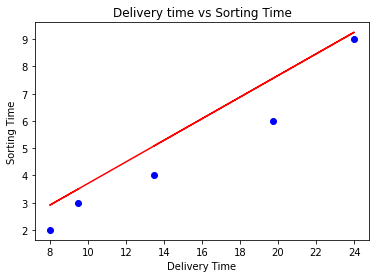

In [44]:
#MODEL TESTING
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test['Delivery Time'],lr.predict(x_test),color='red')
plt.title('Delivery time vs Sorting Time')
plt.xlabel('Delivery Time')
plt.ylabel("Sorting Time")
plt.show()

In [45]:
#back to assumption cheack
x

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [46]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_x=std_scaler.fit_transform(x)
scaled_x=pd.DataFrame(scaled_x,columns=['Delivery Time'])
scaled_x

,Delivery Time
0,0.849867
1,-0.664490
2,0.597474
3,1.455610
4,2.465181
5,-0.290949
6,0.446038
7,-1.472148
8,0.223933
9,0.395560


In [47]:
y_pred=lr.predict(x)
y_pred

array([ 8.06665849,  5.09109917,  7.57073194,  9.25688222, 11.24058843,
        5.82507047,  7.27317601,  3.5041342 ,  6.83676064,  7.17399069,
        7.60247124,  4.00006075,  6.35273632,  4.29761669,  4.50788954,
        5.63860209,  5.19028448,  6.9200763 ,  2.90902234,  6.80898875,
        8.26502911])

In [48]:
error=y-y_pred
error.round(2)

0     1.93
1    -1.09
2    -1.57
3    -0.26
4    -1.24
5     0.17
6    -0.27
7    -0.50
8     3.16
9     1.83
10    0.40
11   -0.00
12    0.65
13   -1.30
14   -1.51
15   -1.64
16    0.81
17    0.08
18   -0.91
19    0.19
20   -3.27
Name: Sorting Time, dtype: float64

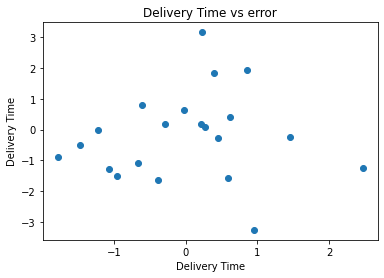

In [49]:
plt.scatter(x=scaled_x['Delivery Time'],y=error)
plt.title('Delivery Time vs error')
plt.xlabel('Delivery Time')
plt.ylabel('Delivery Time')
plt.show()

homoscadasticity is failed

In [50]:
#zero residual mean test..


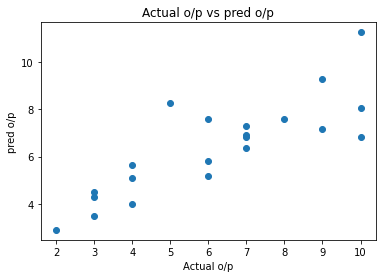

In [51]:
plt.scatter(x=y,y=y_pred)
plt.title('Actual o/p vs pred o/p')
plt.xlabel('Actual o/p')
plt.ylabel('pred o/p')
plt.show()

In [52]:
#EVALUATION
lr.score(x_test , y_test)

0.8440208573963486

In [53]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)
rmse , r2

(0.9802201377438093, 0.8440208573963486)

In [54]:
exp = 30.12
lr.predict([[exp]])[0]
print(f"Sorting Time {exp} Delivery Time = {int(lr.predict([[exp]])[0])} min")

Sorting Time 30.12 Delivery Time = 11 min


In [55]:
exp = 45.23
lr.predict([[exp]])[0]
print(f"Sorting Time {exp} Delivery Time = {int(lr.predict([[exp]])[0])} min")

Sorting Time 45.23 Delivery Time = 17 min


# finding cook distance


In [56]:
import statsmodels.api as sm
sm.add_constant(x)

,const,Delivery Time
0,1.0,21.00
1,1.0,13.50
2,1.0,19.75
3,1.0,24.00
4,1.0,29.00
5,1.0,15.35
6,1.0,19.00
7,1.0,9.50
8,1.0,17.90
9,1.0,18.75


In [57]:
model = sm.OLS(y, x).fit()

In [58]:
np.set_printoptions(suppress=True)

In [59]:
influence = model.get_influence()

In [60]:
cooks = influence.cooks_distance

In [61]:
print(cooks)

(array([0.17894724, 0.01502176, 0.0598047 , 0.00021798, 0.05218012,
       0.00152923, 0.00016158, 0.00197756, 0.29205158, 0.11864944,
       0.01258056, 0.00000004, 0.01403624, 0.01673588, 0.02448566,
       0.04162588, 0.01151981, 0.00179099, 0.00462081, 0.00341178,
       0.35808353]), array([0.67679336, 0.90367616, 0.80929633, 0.9883667 , 0.8216316 ,
       0.9691941 , 0.98998409, 0.96497099, 0.59487653, 0.73409949,
       0.9118122 , 0.99984608, 0.90687345, 0.89835926, 0.87722428,
       0.84039632, 0.91559627, 0.96666317, 0.94647931, 0.9540014 ,
       0.55628954]))


In [62]:
cooks[0]

array([0.17894724, 0.01502176, 0.0598047 , 0.00021798, 0.05218012,
       0.00152923, 0.00016158, 0.00197756, 0.29205158, 0.11864944,
       0.01258056, 0.00000004, 0.01403624, 0.01673588, 0.02448566,
       0.04162588, 0.01151981, 0.00179099, 0.00462081, 0.00341178,
       0.35808353])

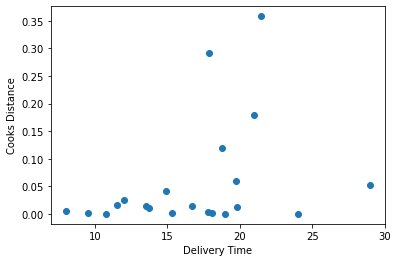

In [63]:
plt.scatter(x["Delivery Time"],cooks[0])
plt.xlabel('Delivery Time')
plt.ylabel('Cooks Distance')
plt.show()

# the end....